In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import ensemble,svm
import xgboost
import seaborn as sns
import tensorflow as tf
from sklearn import metrics


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d sid321axn/heart-statlog-cleveland-hungary-final

  0% 0.00/9.55k [00:00<?, ?B/s]
100% 9.55k/9.55k [00:00<00:00, 20.4MB/s]


In [4]:
!unzip /content/heart-statlog-cleveland-hungary-final.zip

Archive:  /content/heart-statlog-cleveland-hungary-final.zip
  inflating: heart_statlog_cleveland_hungary_final.csv  


In [5]:
data=pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


#Rename columns

In [ ]:
data.rename(columns={'chest pain type':'chest_pain_type',
                     'resting bp s':'resting_bp',
                     'fasting blood sugar':'fasting_blood_suger',
                     'resting ecg':'resting_ecg',
                     'max heart rate':'max_heart_rate',
                     'exercise angina':'exercise_angina',
                     'ST slope':'st_slop'
                     },inplace=True)

#EDA

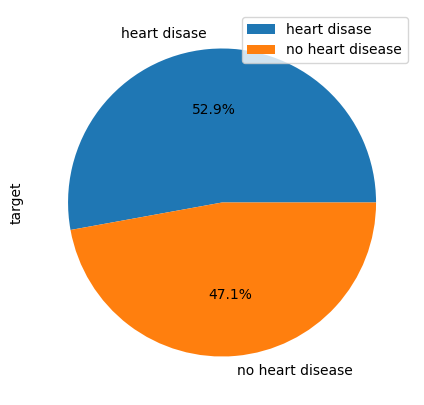

In [ ]:
x2=data.target
x2.value_counts().plot(kind= 'pie',figsize=(10, 5),autopct ='%.1f%%',labels=['heart disase','no heart disease'])
plt.legend(loc='upper right')
plt.show()


In [ ]:
data.target.value_counts()

1    629
0    561
Name: target, dtype: int64

<Axes: >

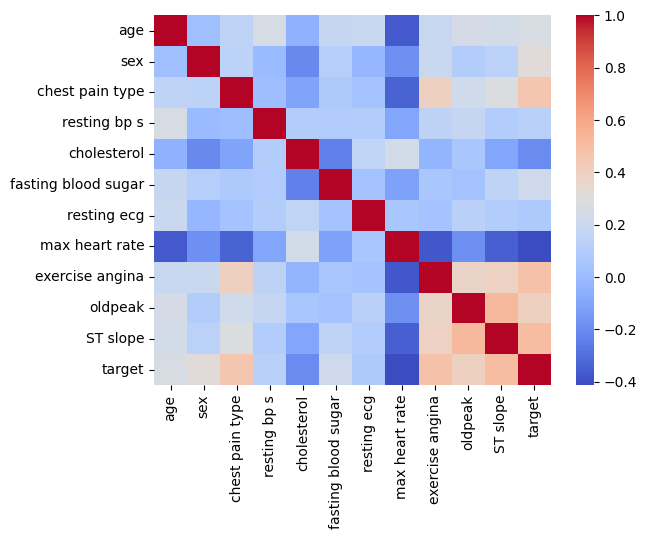

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm')

<ipython-input-9-36dba6c3eefa>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='target',y='age',data=data,palette='rainbow')


<Axes: xlabel='target', ylabel='age'>

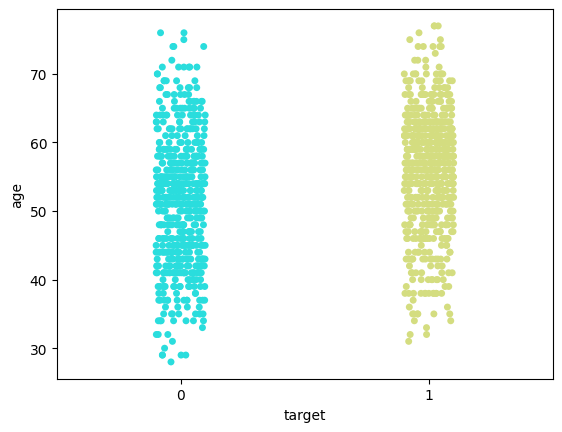

In [ ]:
sns.stripplot(x='target',y='age',data=data,palette='rainbow')

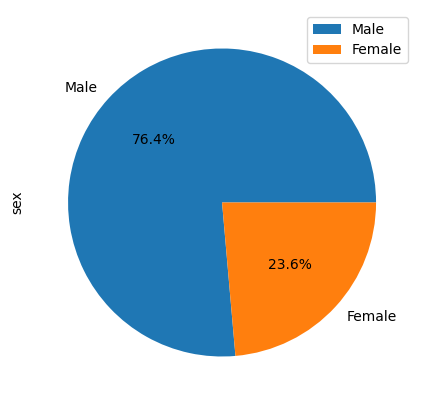

In [ ]:
x3=data.sex
x3.value_counts().plot(kind= 'pie',figsize=(10, 5),autopct ='%.1f%%',labels=['Male','Female'])
plt.legend(loc='upper right')
plt.show()

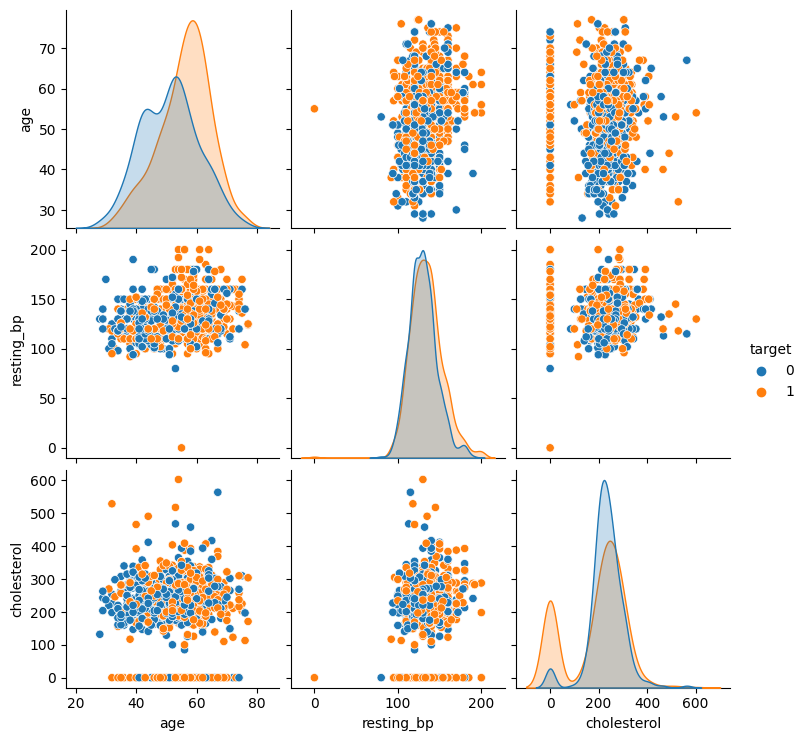

In [ ]:
sns.pairplot(data, hue = 'target', vars = ['age', 'resting_bp', 'cholesterol'] )

<Axes: xlabel='resting_bp', ylabel='age'>

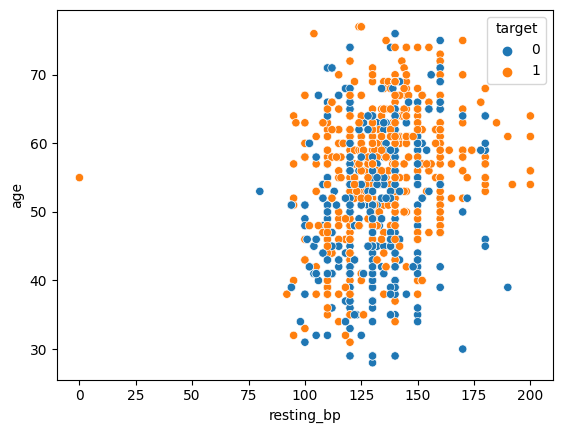

In [ ]:
sns.scatterplot(x='resting_bp',y='age',hue='target',data=data)

#Feature and Target

In [11]:
x=data.drop('target',axis=1)
y=data.target

#Standardization

In [12]:
scaler=preprocessing.StandardScaler()
x_norm=scaler.fit_transform(x)

#Split Dataset

In [13]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=.2,stratify=y,random_state=42)

#logistic Regression

In [95]:
model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [96]:
pred=model.predict(x_test)

In [97]:

acc=[]
precision=[]
recall=[]
acc=metrics.accuracy_score(y_test,pred)
recall=metrics.recall_score(y_test,pred,average='weighted')
precision=metrics.precision_score(y_test,pred,average='weighted')
score=print(pd.DataFrame({'accuracy':[acc],
                    'recall':[recall],
                    'precision':[precision]}))


   accuracy    recall  precision
0  0.840336  0.840336   0.840274


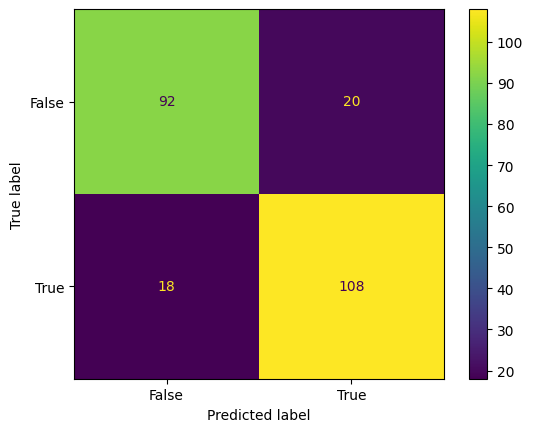

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Random_forest

In [93]:
model2=ensemble.RandomForestClassifier()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)

In [94]:
acc2=[]
precision2=[]
recall2=[]
acc2=metrics.accuracy_score(y_test,pred2)
recall2=metrics.recall_score(y_test,pred2,average='weighted')
precision2=metrics.precision_score(y_test,pred2,average='weighted')
score=print(pd.DataFrame({'accuracy':[acc2],
                    'recall':[recall2],
                    'precision':[precision2]}))


   accuracy    recall  precision
0  0.928571  0.928571   0.928566


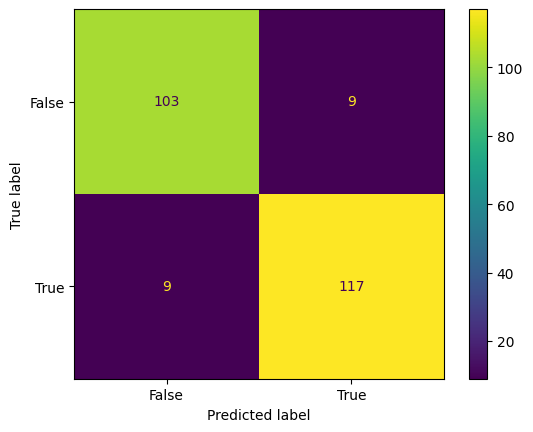

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#SVR

In [91]:
model3=svm.SVC(C=3)
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)

In [92]:
acc3=[]
precision3=[]
recall3=[]
acc3=metrics.accuracy_score(y_test,pred3)
recall3=metrics.recall_score(y_test,pred3,average='weighted')
precision3=metrics.precision_score(y_test,pred3,average='weighted')
score=print(pd.DataFrame({'accuracy':[acc3],
                    'recall':[recall3],
                    'precision':[precision3]}))

   accuracy    recall  precision
0  0.911765  0.911765   0.914874


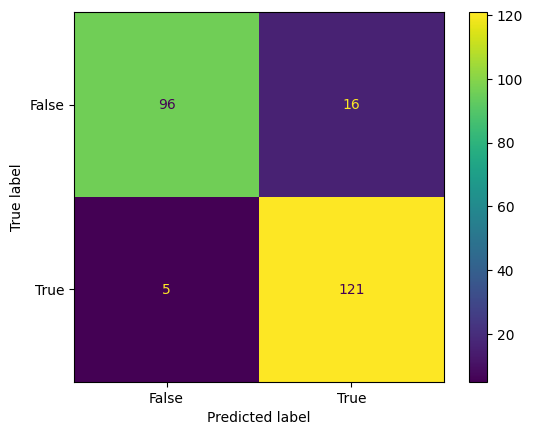

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#XGboost

In [60]:
model4=xgboost.XGBClassifier()
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)

In [61]:
acc4=[]
precision4=[]
recall4=[]
acc4=metrics.accuracy_score(y_test,pred4)
recall4=metrics.recall_score(y_test,pred4,average='weighted')
precision4=metrics.precision_score(y_test,pred4,average='weighted')
score=print(pd.DataFrame({'accuracy':[acc4],
                    'recall':[recall4],
                    'precision':[precision4]}))

   accuracy    recall  precision
0  0.936975  0.936975   0.937346


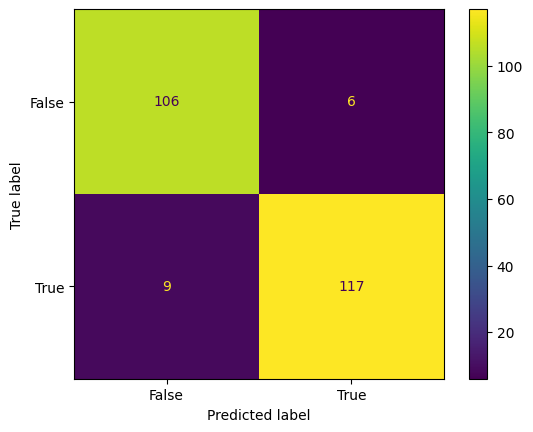

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Catboost classifier

In [78]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.8 MB/s eta 0:00:00


In [79]:
from catboost import CatBoostClassifier

In [80]:
model5=CatBoostClassifier(random_state=42, logging_level='Silent', depth=3, n_estimators=1000, learning_rate=0.05)
model5.fit(x_train,y_train)
pred5=model5.predict(x_test)

In [81]:
acc5=[]
precision5=[]
recall5=[]
acc5=metrics.accuracy_score(y_test,pred5)
recall5=metrics.recall_score(y_test,pred5,average='weighted')
precision5=metrics.precision_score(y_test,pred5,average='weighted')
score=print(pd.DataFrame({'accuracy':[acc5],
                    'recall':[recall5],
                    'precision':[precision5]}))

   accuracy    recall  precision
0  0.941176  0.941176   0.941176


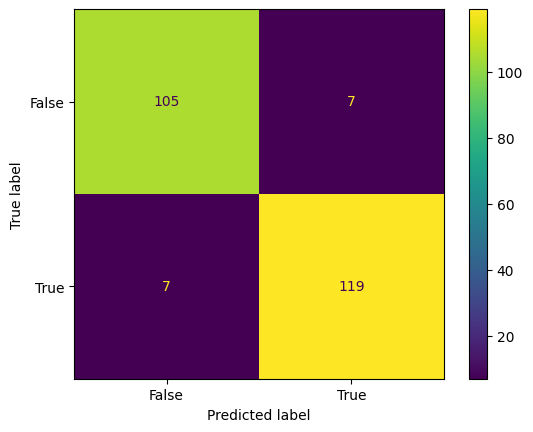

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Roc Curve

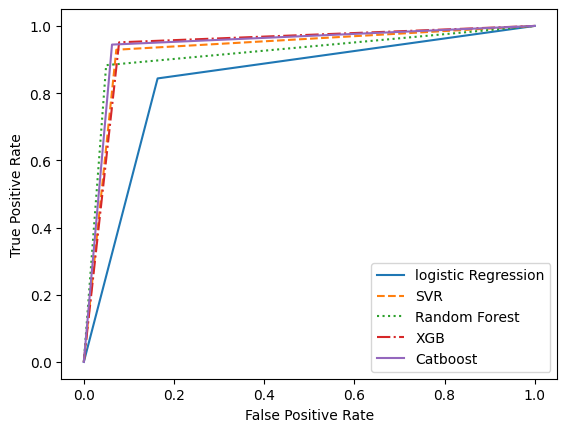

In [125]:
fpr,tpr,_=metrics.roc_curve(pred, y_test)
fpr2,tpr2,_=metrics.roc_curve(pred2,y_test)
fpr3,tpr3,_=metrics.roc_curve(pred3,y_test)
fpr4,tpr4,_=metrics.roc_curve(pred4,y_test)
fpr5,tpr5,_=metrics.roc_curve(pred5,y_test)

plt.plot(fpr,tpr,label="logistic Regression")
plt.legend()
plt.plot(fpr2,tpr2,linestyle='--',label='SVR')
plt.plot(fpr3,tpr3,label='Random Forest',linestyle=':')
plt.plot(fpr4,tpr4,label='XGB',linestyle='-.')
plt.plot(fpr5,tpr5,label='Catboost')
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Fine tuning Grid Search for random forest and xgb

In [ ]:
parameters={

    'n_estimators': [150, 200, 230, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [50, 60,70],
    'max_leaf_nodes': [55, 65, 75],

}
scoring='accuracy'
grid=model_selection.GridSearchCV(estimator=model2,
                                  scoring=scoring,
                                  param_grid=parameters,
                                  n_jobs=-1,
                                  cv=5)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50, 60, 70],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [55, 65, 75],
                         'n_estimators': [150, 200, 230, 1000]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': 75, 'n_estimators': 200}
0.908641499035547


In [62]:
parameters = { "subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

scoring='accuracy'
from sklearn import model_selection
grid=model_selection.GridSearchCV(estimator=model4,
                                param_grid=parameters,
                                scoring=scoring,
                                n_jobs=-1,
                                cv=5)

In [63]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.3, 0.1, 0.03],
                         'max_depth': [2, 6, 12],
                         'min_child_weight': [1, 5, 15], 'n_estimators': [100],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

In [64]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.75}
0.9075888674565995


#Gradio

In [65]:
!pip install Gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [66]:
import gradio as gr

In [ ]:
data.head(1)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_suger,resting ecg,max_heart_rate,exercise_angina,oldpeak,st_slop,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0


In [76]:
def predict_disease(age,
                     sex,
                     chest_pain_type,
                     resting_bp,
                     cholesterol,
                     fasting_blood_suger,
                     resting_ecg,
                     max_heart_rate,
                     exercise_angina,
                     oldpeak,
                     st_slop):
  input=[[age,sex,chest_pain_type,
                     resting_bp,
                     cholesterol,
                     fasting_blood_suger,
                     resting_ecg,
                     max_heart_rate,
                     exercise_angina,
                     oldpeak,
                     st_slop]]
  x=scaler.fit_transform (input)
  predict_value=model4.predict(x)

  if predict_value[0]==0:
    return 'no heart disease'
  else:
    return 'have heart disease'


In [77]:
# Create a Gradio interface
with gr.Blocks() as demo:

    # Create a row in the interface
    with gr.Row():

        # Create a column for input elements
        with gr.Column():
            age = gr.Number(label="Age", value=0)
            sex= gr.Number(label="Sex", value=0)
            chest_pain = gr.Number(label="chest_pain_type", value=0)
            resting_bp= gr.Number(label=" resting_bp")
            cholesterol= gr.Number(label="cholesterol", value=0)
            fasting_blood_sugar = gr.Number(label="fasting_blood_suger", value=0)



        # # Create another column
        with gr.Column():
            resting_ecg= gr.Number(label="resting_ecg")
            max_heart_rate = gr.Number(label="max_heart_rate", value=0)
            exercise_angina= gr.Number(label="exercise_angina", value=0)

            oldpeak= gr.Number(label="oldpeak")
            st_slop = gr.Number(label="st_slop", value=0)

            create_btn=gr.Button(label='Run')
            output_box = gr.Textbox(label="predict heart disease")

    # Define the input and output blocks for the Gradio interface
    input_block = [age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slop]
    create_btn.click(fn=predict_disease, inputs=input_block, outputs=output_box)

# Launch the Gradio interface
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>